<a href="https://colab.research.google.com/github/souza-dev/AC1_Tarefa_2/blob/main/Tarefa_2_ACI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os pacotes necessários

In [10]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Lendo o dataset

In [11]:
digits = datasets.load_digits()
print("Forma de dados da imagem ", digits.data.shape)
print("Forma de dados do rótulo ", digits.target.shape)

Forma de dados da imagem  (1797, 64)
Forma de dados do rótulo  (1797,)


In [12]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Aqui foi feita uma cópia dos dados e aplicado um filtro onde os valores maiores que 5 foram convertidos para 255 e todos os outros para zero.

In [14]:
newData = np.copy(digits.data)
for i in range(len(newData)):
  for j in range(len(newData[i])):
    newData[i][j] = 255 if newData[i][j] > 5 else 0


Plotando alguns dos dados em formato de figura e seus respectivos targets.

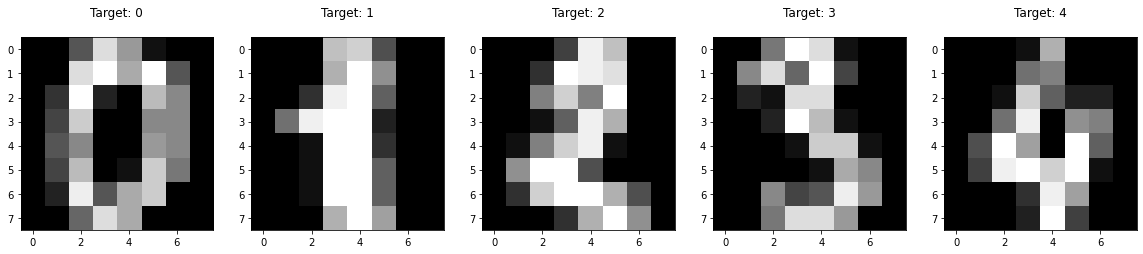

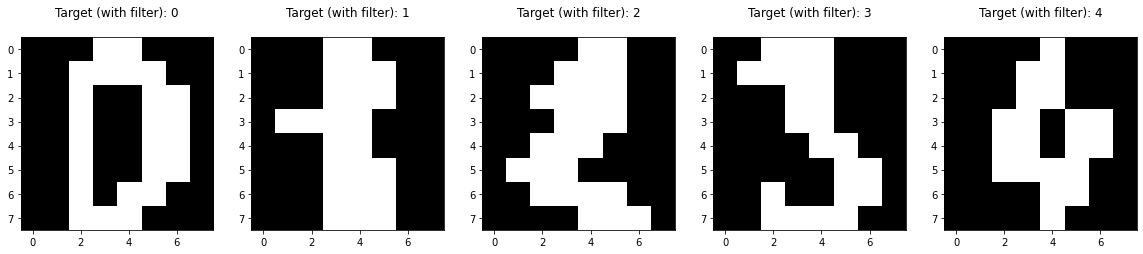

In [15]:
plt.figure(figsize=(20,8))
for index, (image,label) in enumerate(zip(digits.images[0:5], digits.target[0:5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(image, cmap=plt.cm.gray)
  plt.title('Target: {}\n'.format(label, fontsize = 20))

plt.figure(figsize=(20,8))
for index, (image,label) in enumerate(zip(newData[0:5], digits.target[0:5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Target (with filter): {}\n'.format(label, fontsize = 20))

# Separando os dados de treino e de teste

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(digits.data, digits.target, test_size=0.3, shuffle=False, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(newData, digits.target, test_size=0.3, shuffle=False, random_state=42)

# Treinando os modelos

In [17]:
clf = svm.SVC(gamma=0.001, C=100.)

clf.fit(X1_train, y1_train)
y1_pred = clf.predict(X1_test)

clf.fit(X2_train, y2_train)
y2_pred = clf.predict(X2_test)

# Verificando a acurácia

In [18]:
score1 = accuracy_score(y1_pred, y1_test)
score2 = accuracy_score(y2_pred, y2_test)
print(f"O score do treinamento com os dados originais foi {np.round(score1, 2)}")
print(f"O score do treinamento com os dados com filtro foi {np.round(score2, 2)}")


O score do treinamento com os dados originais foi 0.97
O score do treinamento com os dados com filtro foi 0.13


# Conclusão

Como foi retirado informação dos dados, limitando os tons de cinza a valores brancos ou pretos,o score foi menor com o modelo treinado após aplicar o filtro.